In [396]:
#과속+신호,과속,신호 3개 묶어서 한개로, 주정차위반 한개 해서 총 4개로 보여주기

In [41]:
import warnings
warnings.filterwarnings(action='ignore') 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform
import seaborn as sns 
import matplotlib
matplotlib.rcParams['font.family']
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
    #Malgun 
%matplotlib inline

In [42]:
df1 = pd.read_csv('data2/노인무인단속장비 현황.csv')
df2 = pd.read_csv('data2/어린이무인단속장비 현황.csv')

In [43]:
df1

,시도,계,과속+신호,과속,신호,주정차,방범
0,서울시,97,2,0,0,8,87
1,종 로,0,0,0,0,0,0
2,중 구,0,0,0,0,0,0
3,용 산,3,0,0,0,0,3
4,성 동,6,0,0,0,4,2
5,광 진,0,0,0,0,0,0
6,동대문,3,0,0,0,0,3
7,중 랑,0,0,0,0,0,0
8,성 북,1,,0,0,0,1
9,강 북,0,0,0,0,0,0


In [44]:
df1 == ' '

,시도,계,과속+신호,과속,신호,주정차,방범
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False


In [45]:
df1['과속+신호'] = df1['과속+신호'].str.replace(' ','0')
df1['과속'] = df1['과속'].str.replace(' ','0')
df1['신호'] = df1['신호'].str.replace(' ','0')
df1['주정차'] = df1['주정차'].str.replace(' ','0')
df1['방범'] = df1['방범'].str.replace(' ','0')

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      26 non-null     object
 1   계       26 non-null     int64 
 2   과속+신호   26 non-null     object
 3   과속      26 non-null     object
 4   신호      26 non-null     object
 5   주정차     26 non-null     object
 6   방범      26 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.5+ KB


In [47]:
df1 = df1.astype({'시도':'object','계':'int64','과속+신호':'int64','과속':'int64','신호':'int64','주정차':'int64','방범':'int64'})

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      26 non-null     object
 1   계       26 non-null     int64 
 2   과속+신호   26 non-null     int64 
 3   과속      26 non-null     int64 
 4   신호      26 non-null     int64 
 5   주정차     26 non-null     int64 
 6   방범      26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [49]:
df1['과속+신호 all'] = df1['과속+신호']+df1['과속']+df1['신호']
df1

,시도,계,과속+신호,과속,신호,주정차,방범,과속+신호 all
0,서울시,97,2,0,0,8,87,2
1,종 로,0,0,0,0,0,0,0
2,중 구,0,0,0,0,0,0,0
3,용 산,3,0,0,0,0,3,0
4,성 동,6,0,0,0,4,2,0
5,광 진,0,0,0,0,0,0,0
6,동대문,3,0,0,0,0,3,0
7,중 랑,0,0,0,0,0,0,0
8,성 북,1,0,0,0,0,1,0
9,강 북,0,0,0,0,0,0,0


In [50]:
df1 = df1.drop(['시도','계','과속+신호','과속','신호'], axis=1)

In [51]:
df1

,주정차,방범,과속+신호 all
0,8,87,2
1,0,0,0
2,0,0,0
3,0,3,0
4,4,2,0
5,0,0,0
6,0,3,0
7,0,0,0
8,0,1,0
9,0,0,0


In [52]:
pd.DataFrame(df1).to_csv('old.csv')

In [53]:
df2

,Unnamed: 0,시도,계,과속+신호,과속,신호,주정차위반,방범
0,NaN,종 로,25,0,0.0,0.0,0,25
1,1.0,중 구,236,5,0.0,0.0,18,213
2,2.0,용 산,86,0,1.0,1.0,7,77
3,3.0,성 동,193,32,1.0,0.0,29,131
4,4.0,광 진,232,14,2.0,0.0,11,205
5,5.0,동대문,105,14,11.0,0.0,3,77
6,6.0,중 랑,155,11,2.0,0.0,24,118
7,7.0,성 북,144,23,4.0,0.0,89,28
8,8.0,강 북,193,16,2.0,0.0,81,94
9,9.0,도 봉,131,20,4.0,0.0,46,61


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24 non-null     float64
 1   시도          25 non-null     object 
 2   계           25 non-null     int64  
 3   과속+신호       25 non-null     int64  
 4   과속          23 non-null     float64
 5   신호          23 non-null     float64
 6   주정차위반       25 non-null     int64  
 7   방범          25 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.7+ KB


In [55]:
df2['과속+신호 all'] = df2['과속+신호']+df2['과속']+df2['신호']
df2

,Unnamed: 0,시도,계,과속+신호,과속,신호,주정차위반,방범,과속+신호 all
0,NaN,종 로,25,0,0.0,0.0,0,25,0.0
1,1.0,중 구,236,5,0.0,0.0,18,213,5.0
2,2.0,용 산,86,0,1.0,1.0,7,77,2.0
3,3.0,성 동,193,32,1.0,0.0,29,131,33.0
4,4.0,광 진,232,14,2.0,0.0,11,205,16.0
5,5.0,동대문,105,14,11.0,0.0,3,77,25.0
6,6.0,중 랑,155,11,2.0,0.0,24,118,13.0
7,7.0,성 북,144,23,4.0,0.0,89,28,27.0
8,8.0,강 북,193,16,2.0,0.0,81,94,18.0
9,9.0,도 봉,131,20,4.0,0.0,46,61,24.0


In [56]:
df2.fillna(0)

,Unnamed: 0,시도,계,과속+신호,과속,신호,주정차위반,방범,과속+신호 all
0,0.0,종 로,25,0,0.0,0.0,0,25,0.0
1,1.0,중 구,236,5,0.0,0.0,18,213,5.0
2,2.0,용 산,86,0,1.0,1.0,7,77,2.0
3,3.0,성 동,193,32,1.0,0.0,29,131,33.0
4,4.0,광 진,232,14,2.0,0.0,11,205,16.0
5,5.0,동대문,105,14,11.0,0.0,3,77,25.0
6,6.0,중 랑,155,11,2.0,0.0,24,118,13.0
7,7.0,성 북,144,23,4.0,0.0,89,28,27.0
8,8.0,강 북,193,16,2.0,0.0,81,94,18.0
9,9.0,도 봉,131,20,4.0,0.0,46,61,24.0


In [57]:
df2 = df2.drop(['시도','계','과속+신호','과속','신호'], axis=1)
df2

,Unnamed: 0,주정차위반,방범,과속+신호 all
0,NaN,0,25,0.0
1,1.0,18,213,5.0
2,2.0,7,77,2.0
3,3.0,29,131,33.0
4,4.0,11,205,16.0
5,5.0,3,77,25.0
6,6.0,24,118,13.0
7,7.0,89,28,27.0
8,8.0,81,94,18.0
9,9.0,46,61,24.0


In [58]:
df2.fillna(0)

,Unnamed: 0,주정차위반,방범,과속+신호 all
0,0.0,0,25,0.0
1,1.0,18,213,5.0
2,2.0,7,77,2.0
3,3.0,29,131,33.0
4,4.0,11,205,16.0
5,5.0,3,77,25.0
6,6.0,24,118,13.0
7,7.0,89,28,27.0
8,8.0,81,94,18.0
9,9.0,46,61,24.0


In [59]:
pd.DataFrame(df1).to_csv('kids.csv')

In [60]:
print(df1[:1])
print(df2[:1])

   주정차  방범  과속+신호 all
0    8  87          2
   Unnamed: 0  주정차위반  방범  과속+신호 all
0         NaN      0  25        0.0


In [61]:
all=df1.iloc[:1]
all

,주정차,방범,과속+신호 all
0,8,87,2


In [62]:
all1 = df2.iloc[:1]
all1

,Unnamed: 0,주정차위반,방범,과속+신호 all
0,NaN,0,25,0.0


In [63]:
all_df = pd.concat([all,all1], axis=0)
all_df

,주정차,방범,과속+신호 all,Unnamed: 0,주정차위반
0,8.0,87,2.0,NaN,NaN
0,NaN,25,0.0,NaN,0.0


In [32]:
all_df = all_df.reset_index()
all_df

,index,주정차,방범,과속+신호 all,Unnamed: 0,주정차위반
0,0,8.0,87,2.0,NaN,NaN
1,0,NaN,25,0.0,NaN,0.0


In [33]:
all_df = all_df.drop(['index'], axis=1)
all_df

,주정차,방범,과속+신호 all,Unnamed: 0,주정차위반
0,8.0,87,2.0,NaN,NaN
1,NaN,25,0.0,NaN,0.0


In [34]:
all_df = all_df.T
all_df

,0,1
주정차,8.0,NaN
방범,87.0,25.0
과속+신호 all,2.0,0.0
Unnamed: 0,NaN,NaN
주정차위반,NaN,0.0


In [35]:
all_df.columns = ['노인','어린이']
all_df

,노인,어린이
주정차,8.0,NaN
방범,87.0,25.0
과속+신호 all,2.0,0.0
Unnamed: 0,NaN,NaN
주정차위반,NaN,0.0


In [36]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 주정차 to 주정차위반
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   노인      3 non-null      float64
 1   어린이     3 non-null      float64
dtypes: float64(2)
memory usage: 292.0+ bytes


In [37]:
all_df = all_df.T
all_df

,주정차,방범,과속+신호 all,Unnamed: 0,주정차위반
노인,8.0,87.0,2.0,NaN,NaN
어린이,NaN,25.0,0.0,NaN,0.0


In [38]:
all_df.index

Index(['노인', '어린이'], dtype='object')

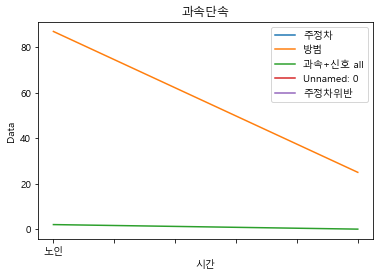

In [39]:
all_df.plot()
plt.title("과속단속")
plt.xlabel("시간")
plt.ylabel("Data")
plt.show()

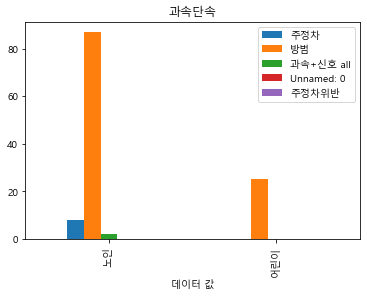

In [40]:
all_df.plot.bar()
plt.title("과속단속")
plt.xlabel("데이터 값")
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

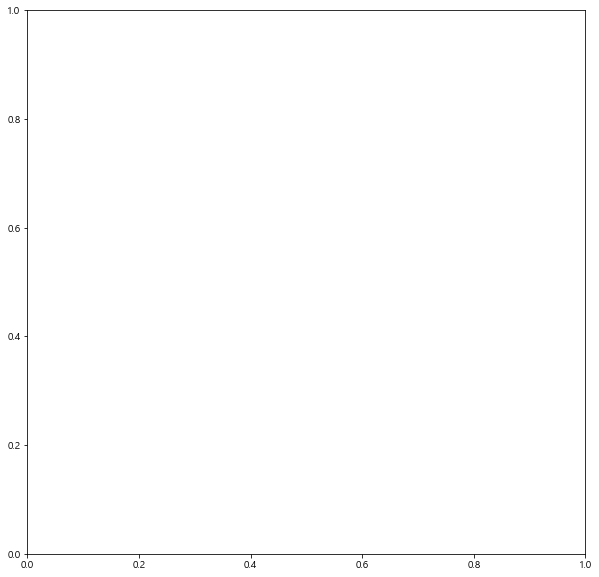

In [64]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
all_df = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
all_df.plot(all_df['어린이'],all_df['노인']) ## 선그래프 생성
 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('Sales for 10 days',fontsize=20) ## 타이틀 설정
plt.show()

In [ ]:

## Matplotlib pyplot 그리기
# 플롯 스타일 지정하기 - 선 스타일, 색깔, 마커
 
## Jupyter Notebook의 Magic command로  notebook 내에서 figure를 볼 수 있게 해줌
%matplotlib inline 
 
## matplotlib의 pyplot import
import matplotlib.pyplot as plt
## numpy random를 import
from numpy.random import randn
import numpy as np
 
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
 
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
 
ax1.plot(randn(30).cumsum(), 'k--')   ## 그냥 점선
ax2.plot(randn(30).cumsum(), 'ko--')  ## 점선 + 마커
ax3.plot(randn(30).cumsum(), 'yo-', markeredgecolor='r')  ## 점선 + 마커 테두리색
ax4.plot(randn(30).cumsum(), 'ko-', markerfacecolor='y')  ## 점선 + 마커 내부색
ax5.plot(randn(30).cumsum(), label='Default')  ## 기본 plot
ax6.plot(randn(30).cumsum(), drawstyle='steps-post', label='steps-post') ## 계단식 plot
 
Colored by Color Scripter
cs


출처: https://korbillgates.tistory.com/155 [생물정보학자의 블로그]

KeyError: '주정차'

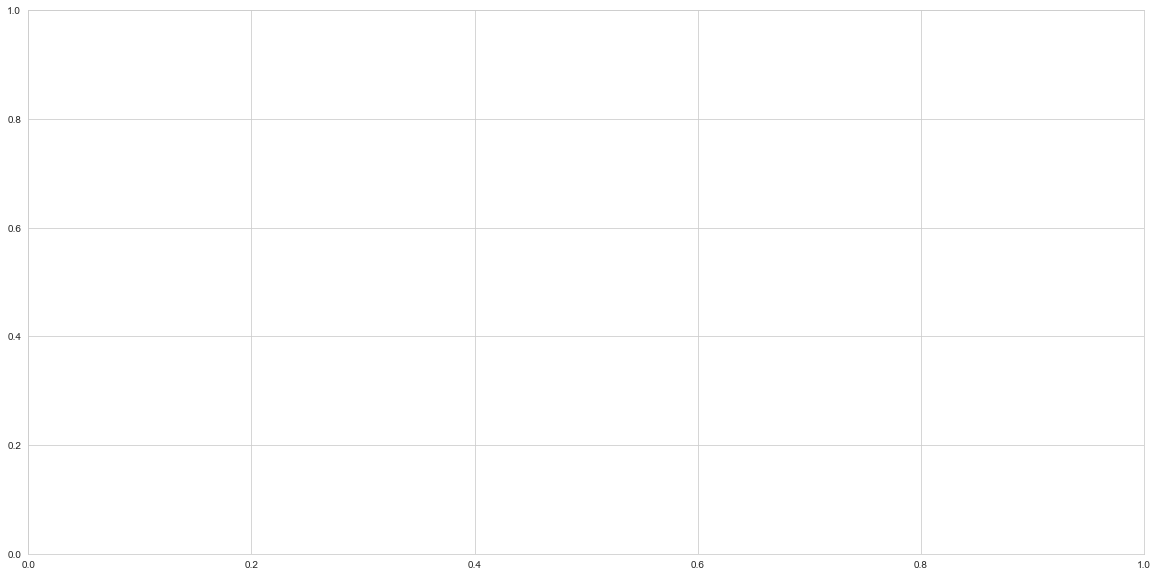

<Figure size 2160x1440 with 0 Axes>

In [336]:
plt.rcParams['figure.figsize'] = (20,10)
fig, ax1 = plt.subplots()
plt.figure(figsize=(30,20))
ax1.plot(all_df.index, all_df['주정차'], color='red', label='어린이')
ax2 = ax1.twinx()
ax2.plot(all_df.index, all_df['방범'], color='blue', label = '노인')
ax1.legend()
ax2.legend()

plt.show()

ValueError: '노인' is not a valid value for loc; supported values are 'left', 'center', 'right'

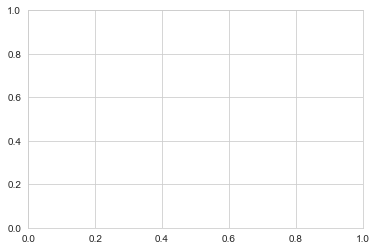

In [330]:
plt.xlabel('노인아동', int=30, loc='노인')
plt.ylabel('과속',int=30, loc='방범')

In [320]:
all_df = pd.DataFrame(np.random.randn(3,2))

In [67]:
all_df.plot(kind='barh')

[]

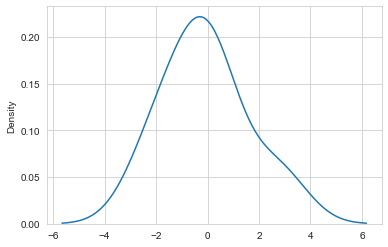

In [322]:
sns.distplot(all_df, rug=False, hist=False, kde=True)
plt.show()

In [323]:
sns.lmplot(x=("주정차"), y=("방범"), height=8, data=all_df)
plt.show()

KeyError: "None of [Index(['방범', '주정차'], dtype='object')] are in the [columns]"

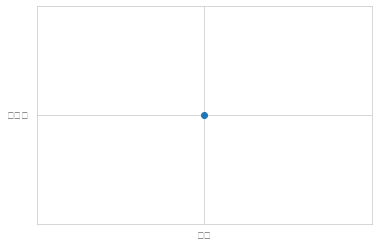

In [325]:
plt.figure()

# marker 인자를 같이 적는다.
plt.plot(["노인"], [""], marker='o')

plt.show()

In [ ]:
sns.lmplot(x="주정차", y="방범", hue="과속+신호 all", height=8, data=all_df)
plt.show()

In [248]:
year = ['주정차','방범','과속+신호 all']
index=np,all_df(len(year))
int64=[8,664,87,3623,2,438]
plt.bar(index,goals,color='y')
plt.title('실버존과 스쿨존 비교')
plt.xticks(index,year)
plt.yticks(int64)
plt.xlabel('실버존','스쿨존')
plt.ylabel('숫자')

TypeError: 'DataFrame' object is not callable

In [ ]:
plt.figure(figsize=(20,11))
plt.bar(covid_bicycle[covid_bicycle['year']==2020]['month'], covid_bicycle[covid_bicycle['year']==2020]['이용건수'], label='2020년', color='pink')
plt.bar(covid_bicycle[covid_bicycle['year']==2021]['month'], covid_bicycle[covid_bicycle['year']==2021]['이용건수'], label='2021년', color='blue')
pl = sns.barplot(x='month', y='이용건수', hue='year', data=covid_bicycle)
plt.legend(fontsize=30)
plt.title('실버존과 스쿨존 비교',fontsize=30)
plt.xlabel('월', fontsize=20)
plt.ylabel('이용건수', fontsize=20)
for temp in pl.patches:
    pl.annotate('%d'%temp.get_height(),(temp.get_x()+temp.get_width()/2 , temp.get_height()) , ha = 'center' , va='bottom')